In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from pyramid-arima.

In [3]:
# Loading the dataset
Cap=pd.read_csv('24-03-2019.csv')

In [4]:
# Head of the data
Cap.head()

,Year,Country Name,Health Workforce,Healthcare Activities,Adolescent Fertitlity rate(births per 1000 women ages 15-19),"Fertility rate, total (births per woman)",Survival to age 65 Female,Survival to age 65 Male,Survival to age 65 (% of cohort),Infant Mortality,Avg Mortality Rate,"Mortality rate, adult, female","Mortality rate, adult, male",Overall Population,Female Population,Male Population,Population Growth Rate,Age dependency Ratio,Sex Ratio(Male to Female)
0,1960,European Union,NaN,NaN,-0.240377,-0.175933,0.118371,0.040324,0.079347,NaN,-0.275233,-0.285502,-0.264963,0.040191,0.839253,0.622655,-0.542898,-0.162078,0.821584
1,1961,European Union,NaN,NaN,-0.213048,-0.168673,0.156453,0.065586,0.111020,NaN,-0.303875,-0.321378,-0.286372,0.039921,0.854174,0.639082,-0.508897,-0.137044,0.824330
2,1962,European Union,NaN,NaN,-0.187328,-0.171574,0.194690,0.090843,0.142766,NaN,-0.286403,-0.314099,-0.258707,0.041219,0.869780,0.655826,-0.634063,-0.121763,0.826359
3,1963,European Union,NaN,NaN,-0.188559,-0.150098,0.214221,0.102519,0.158370,NaN,-0.290609,-0.324141,-0.257077,0.043544,0.885752,0.672347,-0.607015,-0.112616,0.827480
4,1964,European Union,NaN,NaN,-0.191342,-0.130377,0.233770,0.114194,0.173982,NaN,-0.338486,-0.366055,-0.310918,0.045938,0.901654,0.687978,-0.490586,-0.103209,0.827501


In [5]:
Cap['Country Name'].unique()

array(['European Union', 'Argentina', 'Australia', 'Brazil', 'Canada',
       'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy',
       'Japan', 'Korea, Rep.', 'Mexico', 'Russian Federation',
       'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom',
       'United States'], dtype=object)

# Aggregation of indicators 

In [6]:
# Favourable Indicators for TS forecasting
meanlist=[]
for i in range(len(Cap)):
    templist =[Cap['Health Workforce'][i],Cap['Fertility rate, total (births per woman)'][i],
                Cap['Survival to age 65 (% of cohort)'][i],
               Cap['Overall Population'][i]]
    tempser = pd.Series(templist)
    #print(tempser)
    meanlist.append(tempser.mean())
    #print(meanlist)
    Positive_Indicators=pd.DataFrame(meanlist)
    Positive_Indicators.columns=['Positive Indicators']
    

# Unfavourable Indicators for TS forecasting
meanlist=[]
for i in range(len(Cap)):
    templist =[Cap['Adolescent Fertitlity rate(births per 1000 women ages 15-19)'][i],Cap['Infant Mortality'][i],
               Cap['Avg Mortality Rate'][i],Cap['Population Growth Rate'][i],
                Cap['Age dependency Ratio'][i],Cap['Sex Ratio(Male to Female)'][i]]
    tempser = pd.Series(templist)
    #print(tempser)
    meanlist.append(tempser.mean())
    #print(meanlist)
    Negative_Indicators=pd.DataFrame(meanlist)
    Negative_Indicators.columns=['Negative Indicators']

In [7]:
# Final indicators
coun=Cap[['Year','Country Name']]
final=pd.concat([coun,Positive_Indicators,Negative_Indicators],axis=1)
final.head()

,Year,Country Name,Positive Indicators,Negative Indicators
0,1960,European Union,-0.018798,-0.079800
1,1961,European Union,-0.005911,-0.067707
2,1962,European Union,0.004137,-0.080640
3,1963,European Union,0.017272,-0.074264
4,1964,European Union,0.029848,-0.059224


In [8]:
final.shape

(1120, 4)

In [9]:
#final.to_csv('Aggregated.csv',index=False)

# Time Series forecasting for India 

In [10]:
df=final[final['Country Name']=='India']

date_range=pd.date_range(start='1/1/1960',end='31/12/2015',freq='y')
date_range
df.index=date_range
df.head()


,Year,Country Name,Positive Indicators,Negative Indicators
1960-12-31,1960,India,-0.432078,1.377269
1961-12-31,1961,India,-0.412879,1.390502
1962-12-31,1962,India,-0.395003,1.412906
1963-12-31,1963,India,-0.374281,1.436395
1964-12-31,1964,India,-0.354485,1.456667


In [11]:

df.isnull().sum()

Year                   0
Country Name           0
Positive Indicators    0
Negative Indicators    0
dtype: int64

# Positive Indicators

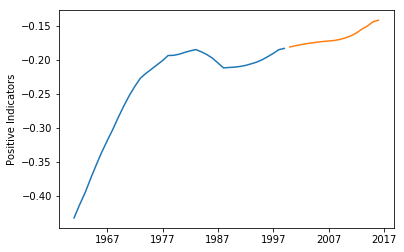

In [12]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Positive Indicators'],ci=None)
sns.lineplot(test.index,test['Positive Indicators'],ci=None)
plt.show()



In [13]:
ts=df['Positive Indicators'] 

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

Text(0.5,1,'RSS: nan')

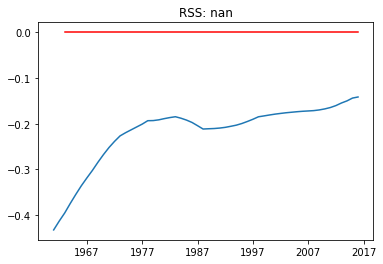

In [14]:
# ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(0, 2, 0)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [15]:
# ARIMA model summary
results_ARIMA.summary()

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D2.Positive Indicators   No. Observations:                   54
Model:                     ARIMA(0, 2, 0)   Log Likelihood                 256.739
Method:                               css   S.D. of innovations              0.002
Date:                    Fri, 29 Mar 2019   AIC                           -509.477
Time:                            00:15:26   BIC                           -505.499
Sample:                        12-31-1962   HQIC                          -507.943
                             - 12-31-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.099      0.277      -0.001       0.000
==============================================================================
"""

In [16]:
# Predicting the values for Training part

pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Positive_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

54


C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator
1960-12-31,1960,India,-0.432078,1.377269,NaN
1961-12-31,1961,India,-0.412879,1.390502,NaN
1962-12-31,1962,India,-0.395003,1.412906,-0.000312
1963-12-31,1963,India,-0.374281,1.436395,-0.000312
1964-12-31,1964,India,-0.354485,1.456667,-0.000312
1965-12-31,1965,India,-0.335632,1.468960,-0.000312
1966-12-31,1966,India,-0.318565,1.476121,-0.000312
1967-12-31,1967,India,-0.302145,1.474947,-0.000312
1968-12-31,1968,India,-0.284275,1.469067,-0.000312
1969-12-31,1969,India,-0.267523,1.462609,-0.000312


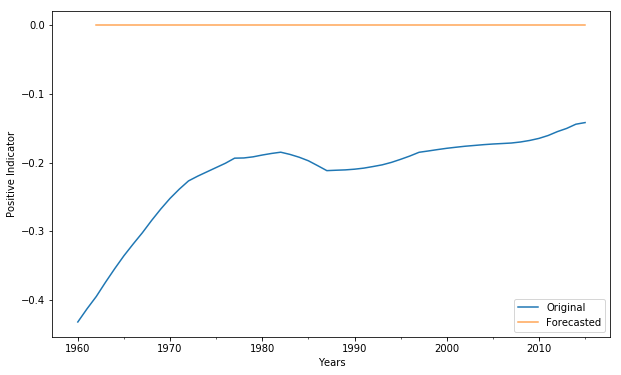

In [17]:
axis = df['Positive Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Positive_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Positive Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [18]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [19]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,-0.139673,0.002084,-0.139804,-0.139542
2017-12-31,-0.137929,0.004660,-0.138221,-0.137637
2018-12-31,-0.136497,0.007798,-0.136986,-0.136008
2019-12-31,-0.135376,0.011416,-0.136092,-0.134660
2020-12-31,-0.134567,0.015457,-0.135536,-0.133598


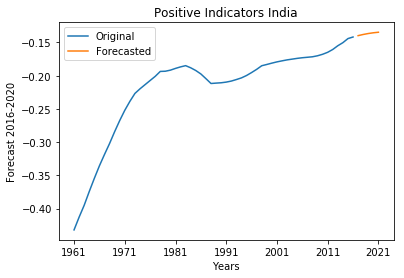

In [20]:
sns.lineplot(df.index,df['Positive Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Positive Indicators India')
plt.xlabel('Years')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import  accuracy_score

# MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mape=mean_absolute_percentage_error(df['Positive Indicators'][2:],df['Forecasted_Positive_Indicator'][2:])
#MAPE.append(mape)
print('The MAPE value for ARIMA model is :',mape)
mse = ((df['Positive Indicators'][2:] - df['Forecasted_Positive_Indicator'][2:]) ** 2).mean()
rmse = np.sqrt(mse)
print('The RMSE value for ARIMA model is :',rmse)
#RMSE.append(rmse)

The MAPE value for ARIMA model is : 99.84370911740112
The RMSE value for ARIMA model is : 0.2173991318315316


# Negative Indicators

In [22]:
ts=df['Negative Indicators']

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

Text(0.5,1,'RSS: nan')

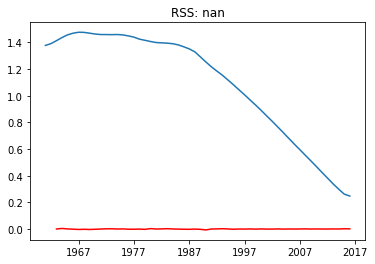

In [23]:
# ARIMA model
model = ARIMA(ts, order=(1, 2, 0)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [24]:
# ARIMA model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D2.Negative Indicators   No. Observations:                   54
Model:                     ARIMA(1, 2, 0)   Log Likelihood                 211.503
Method:                           css-mle   S.D. of innovations              0.005
Date:                    Fri, 29 Mar 2019   AIC                           -417.006
Time:                            00:16:40   BIC                           -411.039
Sample:                        12-31-1962   HQIC                          -414.704
                             - 12-31-2015                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -4.843e-05      0.001     -0.041      0.968      -0.002       0.002
ar.L1.D2.Negative Indicators     0.4355      0.172      2.528      0.015       0.098       0.773
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2962           +0.0000j            2.2962            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
ts.head()

1960-12-31    1.377269
1961-12-31    1.390502
1962-12-31    1.412906
1963-12-31    1.436395
1964-12-31    1.456667
Freq: A-DEC, Name: Negative Indicators, dtype: float64

In [26]:
# Predicting the values for Training part
pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Negative_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

54


C:\Users\HII\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator,Forecasted_Negative_Indicator
1960-12-31,1960,India,-0.432078,1.377269,NaN,NaN
1961-12-31,1961,India,-0.412879,1.390502,NaN,NaN
1962-12-31,1962,India,-0.395003,1.412906,-0.000312,-0.000048
1963-12-31,1963,India,-0.374281,1.436395,-0.000312,0.003967
1964-12-31,1964,India,-0.354485,1.456667,-0.000312,0.000445
1965-12-31,1965,India,-0.335632,1.468960,-0.000312,-0.001428
1966-12-31,1966,India,-0.318565,1.476121,-0.000312,-0.003502
1967-12-31,1967,India,-0.302145,1.474947,-0.000312,-0.002262
1968-12-31,1968,India,-0.284275,1.469067,-0.000312,-0.003658
1969-12-31,1969,India,-0.267523,1.462609,-0.000312,-0.002077


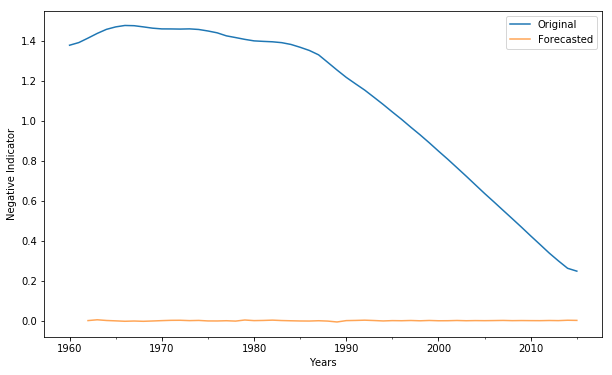

In [27]:
axis = df['Negative Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Negative_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Negative Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [28]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

In [29]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,0.242937,0.004807,0.242635,0.243238
2017-12-31,0.242979,0.012657,0.242186,0.243773
2018-12-31,0.244874,0.023265,0.243415,0.246333
2019-12-31,0.247547,0.036198,0.245277,0.249817
2020-12-31,0.250532,0.051132,0.247326,0.253739


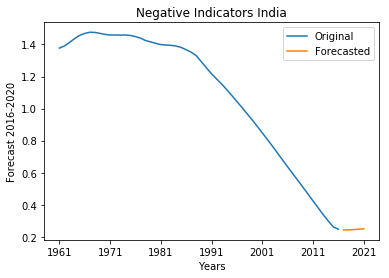

In [30]:
sns.lineplot(df.index,df['Negative Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Negative Indicators India')
plt.xlabel('Years')
plt.legend()
plt.show()

# Time Series forecasting for US 

In [129]:
df=final[final['Country Name']=='United States']

date_range=pd.date_range(start='1/1/1960',end='31/12/2015',freq='y')
date_range
df.index=date_range
df.head()


,Year,Country Name,Positive Indicators,Negative Indicators
1960-12-31,1960,United States,0.143233,0.319419
1961-12-31,1961,United States,0.137721,0.343362
1962-12-31,1962,United States,0.106158,0.315122
1963-12-31,1963,United States,0.077423,0.287676
1964-12-31,1964,United States,0.051822,0.267723


In [130]:

df.isnull().sum()

Year                   0
Country Name           0
Positive Indicators    0
Negative Indicators    0
dtype: int64

# Positive Indicators

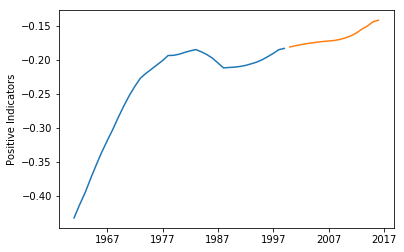

In [31]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Positive Indicators'],ci=None)
sns.lineplot(test.index,test['Positive Indicators'],ci=None)
plt.show()



In [32]:
ts=df['Positive Indicators'] 

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

Text(0.5,1,'RSS: 0.0122')

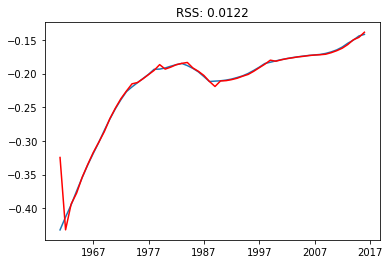

In [33]:
# ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(2, 0, 0)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [34]:
# ARIMA model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     Positive Indicators   No. Observations:                   56
Model:                      ARMA(2, 0)   Log Likelihood                 260.074
Method:                        css-mle   S.D. of innovations              0.002
Date:                 Fri, 29 Mar 2019   AIC                           -512.149
Time:                         00:19:17   BIC                           -504.047
Sample:                     12-31-1960   HQIC                          -509.008
                          - 12-31-2015                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.3245      0.128     -2.532      0.014      -0.576      -0.073
ar.L1.Positive Indicators     1.9761      0.018    107.676      0.000       1.940       2.012
ar.L2.Positive Indicators    -0.9786      0.019    -52.819      0.000      -1.015      -0.942
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0096           -0.0498j            1.0109           -0.0078
AR.2            1.0096           +0.0498j            1.0109            0.0078
-----------------------------------------------------------------------------
"""

In [35]:
# Predicting the values for Training part

pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Positive_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

56


C:\Users\HII\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator,Forecasted_Negative_Indicator
1960-12-31,1960,India,-0.432078,1.377269,-0.324514,NaN
1961-12-31,1961,India,-0.412879,1.390502,-0.431941,NaN
1962-12-31,1962,India,-0.395003,1.412906,-0.393868,-0.000048
1963-12-31,1963,India,-0.374281,1.436395,-0.377331,0.003967
1964-12-31,1964,India,-0.354485,1.456667,-0.353878,0.000445
1965-12-31,1965,India,-0.335632,1.468960,-0.335036,-0.001428
1966-12-31,1966,India,-0.318565,1.476121,-0.317155,-0.003502
1967-12-31,1967,India,-0.302145,1.474947,-0.301879,-0.002262
1968-12-31,1968,India,-0.284275,1.469067,-0.286133,-0.003658
1969-12-31,1969,India,-0.267523,1.462609,-0.266888,-0.002077


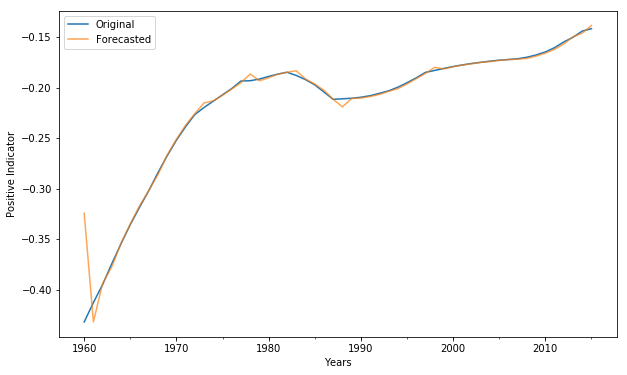

In [36]:
axis = df['Positive Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Positive_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Positive Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [37]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

In [38]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,-0.139873,0.002085,-0.140004,-0.139742
2017-12-31,-0.138522,0.004618,-0.138812,-0.138233
2018-12-31,-0.137670,0.007652,-0.138150,-0.137190
2019-12-31,-0.137306,0.011089,-0.138002,-0.136611
2020-12-31,-0.137423,0.014857,-0.138354,-0.136491


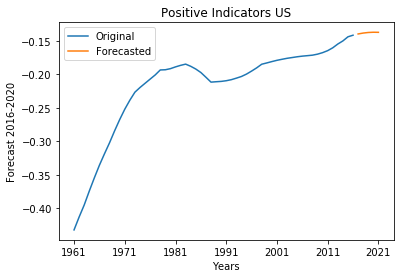

In [39]:
sns.lineplot(df.index,df['Positive Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Positive Indicators US')
plt.xlabel('Years')
plt.legend()
plt.show()

# Negative Indicators

In [40]:
ts=df['Negative Indicators']

Text(0.5,1,'RSS: nan')

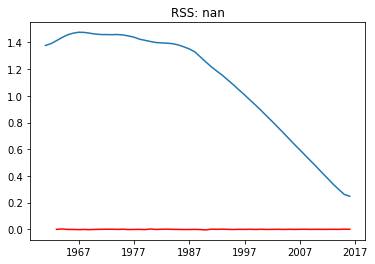

In [41]:
# ARIMA model
model = ARIMA(ts, order=(0, 2, 1)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [42]:
# ARIMA model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D2.Negative Indicators   No. Observations:                   54
Model:                     ARIMA(0, 2, 1)   Log Likelihood                 210.567
Method:                           css-mle   S.D. of innovations              0.005
Date:                    Fri, 29 Mar 2019   AIC                           -415.134
Time:                            00:19:23   BIC                           -409.167
Sample:                        12-31-1962   HQIC                          -412.833
                             - 12-31-2015                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0003      0.001     -0.379      0.706      -0.002       0.001
ma.L1.D2.Negative Indicators     0.3031      0.144      2.105      0.040       0.021       0.585
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.2987           +0.0000j            3.2987            0.5000
-----------------------------------------------------------------------------
"""

In [43]:
ts.head()

1960-12-31    1.377269
1961-12-31    1.390502
1962-12-31    1.412906
1963-12-31    1.436395
1964-12-31    1.456667
Freq: A-DEC, Name: Negative Indicators, dtype: float64

In [44]:
# Predicting the values for Training part
pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Negative_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

54


C:\Users\HII\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator,Forecasted_Negative_Indicator
1960-12-31,1960,India,-0.432078,1.377269,-0.324514,NaN
1961-12-31,1961,India,-0.412879,1.390502,-0.431941,NaN
1962-12-31,1962,India,-0.395003,1.412906,-0.393868,-0.000329
1963-12-31,1963,India,-0.374281,1.436395,-0.377331,0.002308
1964-12-31,1964,India,-0.354485,1.456667,-0.353878,-0.000698
1965-12-31,1965,India,-0.335632,1.468960,-0.335036,-0.001093
1966-12-31,1966,India,-0.318565,1.476121,-0.317155,-0.002417
1967-12-31,1967,India,-0.302145,1.474947,-0.301879,-0.001152
1968-12-31,1968,India,-0.284275,1.469067,-0.286133,-0.002507
1969-12-31,1969,India,-0.267523,1.462609,-0.266888,-0.000996


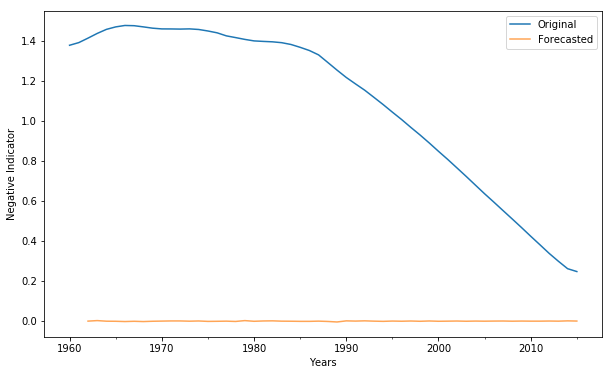

In [45]:
axis = df['Negative Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Negative_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Negative Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [46]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [47]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,0.239592,0.004897,0.239285,0.239899
2017-12-31,0.231647,0.012295,0.230876,0.232418
2018-12-31,0.223373,0.021517,0.222024,0.224722
2019-12-31,0.214769,0.032263,0.212746,0.216792
2020-12-31,0.205836,0.044343,0.203055,0.208616


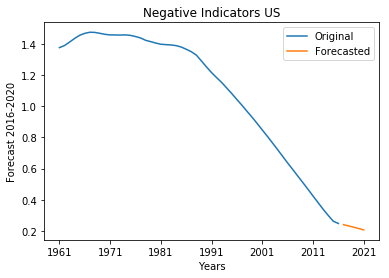

In [48]:
sns.lineplot(df.index,df['Negative Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Negative Indicators US')
plt.xlabel('Years')
plt.legend()
plt.show()

# Time Series forecasting for South Africa 

In [49]:
df=final[final['Country Name']=='South Africa']

date_range=pd.date_range(start='1/1/1960',end='31/12/2015',freq='y')
date_range
df.index=date_range
df.head()


,Year,Country Name,Positive Indicators,Negative Indicators
1960-12-31,1960,South Africa,-0.256328,0.956816
1961-12-31,1961,South Africa,-0.249166,0.964875
1962-12-31,1962,South Africa,-0.244403,0.969741
1963-12-31,1963,South Africa,-0.241572,0.968274
1964-12-31,1964,South Africa,-0.240906,0.964349


In [50]:

df.isnull().sum()

Year                   0
Country Name           0
Positive Indicators    0
Negative Indicators    0
dtype: int64

# Positive Indicators

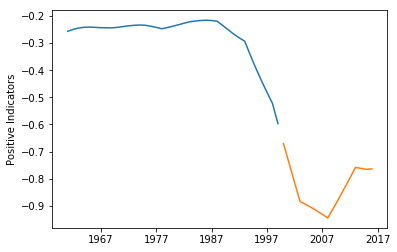

In [51]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['Positive Indicators'],ci=None)
sns.lineplot(test.index,test['Positive Indicators'],ci=None)
plt.show()



In [52]:
ts=df['Positive Indicators'] 

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

Text(0.5,1,'RSS: nan')

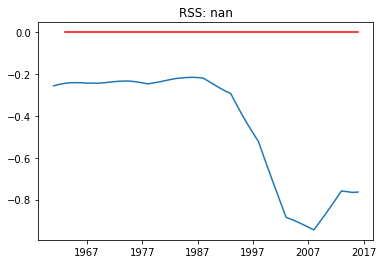

In [53]:
# ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(0, 2, 0)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [54]:
# ARIMA model summary
results_ARIMA.summary()

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D2.Positive Indicators   No. Observations:                   54
Model:                     ARIMA(0, 2, 0)   Log Likelihood                 153.153
Method:                               css   S.D. of innovations              0.014
Date:                    Fri, 29 Mar 2019   AIC                           -302.305
Time:                            00:20:58   BIC                           -298.327
Sample:                        12-31-1962   HQIC                          -300.771
                             - 12-31-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.002     -0.054      0.957      -0.004       0.004
==============================================================================
"""

In [55]:
# Predicting the values for Training part

pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Positive_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

54


C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator
1960-12-31,1960,South Africa,-0.256328,0.956816,NaN
1961-12-31,1961,South Africa,-0.249166,0.964875,NaN
1962-12-31,1962,South Africa,-0.244403,0.969741,-0.000104
1963-12-31,1963,South Africa,-0.241572,0.968274,-0.000104
1964-12-31,1964,South Africa,-0.240906,0.964349,-0.000104
1965-12-31,1965,South Africa,-0.241709,0.958669,-0.000104
1966-12-31,1966,South Africa,-0.243062,0.952530,-0.000104
1967-12-31,1967,South Africa,-0.243390,0.946260,-0.000104
1968-12-31,1968,South Africa,-0.243574,0.964308,-0.000104
1969-12-31,1969,South Africa,-0.241842,0.982956,-0.000104


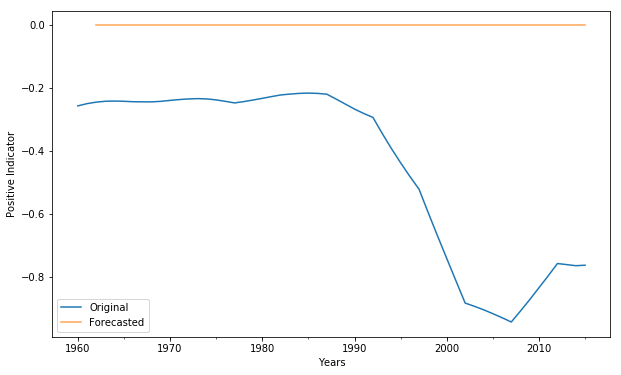

In [56]:
axis = df['Positive Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Positive_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Positive Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [57]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [58]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,-0.762525,0.014192,-0.763415,-0.761635
2017-12-31,-0.761196,0.031734,-0.763186,-0.759206
2018-12-31,-0.759971,0.053101,-0.763300,-0.756641
2019-12-31,-0.758850,0.077731,-0.763724,-0.753975
2020-12-31,-0.757833,0.105249,-0.764433,-0.751233


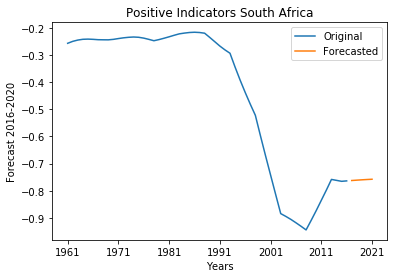

In [59]:
sns.lineplot(df.index,df['Positive Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Positive Indicators South Africa')
plt.xlabel('Years')
plt.legend()
plt.show()

# Negative Indicators

In [68]:
ts=df['Negative Indicators']

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

Text(0.5,1,'RSS: 748.8605')

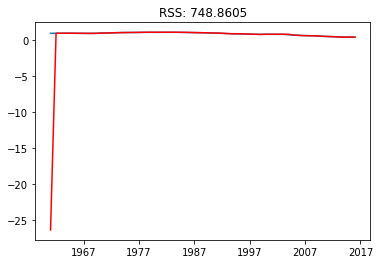

In [69]:
# ARIMA model
model = ARIMA(ts, order=(2, 0, 0)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))

In [70]:
# ARIMA model summary
results_ARIMA.summary()

C:\Users\HII\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\HII\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\HII\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\HII\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     Negative Indicators   No. Observations:                   56
Model:                      ARMA(2, 0)   Log Likelihood                 157.119
Method:                        css-mle   S.D. of innovations              0.013
Date:                 Fri, 29 Mar 2019   AIC                           -306.239
Time:                         00:21:43   BIC                           -298.137
Sample:                     12-31-1960   HQIC                          -303.098
                          - 12-31-2015                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -26.4083        nan        nan        nan         nan         nan
ar.L1.Negative Indicators     1.8235        nan        nan        nan         nan         nan
ar.L2.Negative Indicators    -0.8235        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
AR.2            1.2143           +0.0000j            1.2143            0.0000
-----------------------------------------------------------------------------
"""

In [71]:
ts.head()

1960-12-31    0.956816
1961-12-31    0.964875
1962-12-31    0.969741
1963-12-31    0.968274
1964-12-31    0.964349
Freq: A-DEC, Name: Negative Indicators, dtype: float64

In [72]:
# Predicting the values for Training part
pred=results_ARIMA.predict()
print(len(pred))
df['Forecasted_Negative_Indicator']=pred
#df.drop('Forecasted',axis=1,inplace=True)
df

56


C:\Users\HII\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Year,Country Name,Positive Indicators,Negative Indicators,Forecasted_Positive_Indicator,Forecasted_Negative_Indicator
1960-12-31,1960,South Africa,-0.256328,0.956816,NaN,-26.408340
1961-12-31,1961,South Africa,-0.249166,0.964875,NaN,0.956804
1962-12-31,1962,South Africa,-0.244403,0.969741,-0.000104,0.971491
1963-12-31,1963,South Africa,-0.241572,0.968274,-0.000104,0.973728
1964-12-31,1964,South Africa,-0.240906,0.964349,-0.000104,0.967046
1965-12-31,1965,South Africa,-0.241709,0.958669,-0.000104,0.961096
1966-12-31,1966,South Africa,-0.243062,0.952530,-0.000104,0.953971
1967-12-31,1967,South Africa,-0.243390,0.946260,-0.000104,0.947455
1968-12-31,1968,South Africa,-0.243574,0.964308,-0.000104,0.941077
1969-12-31,1969,South Africa,-0.241842,0.982956,-0.000104,0.979149


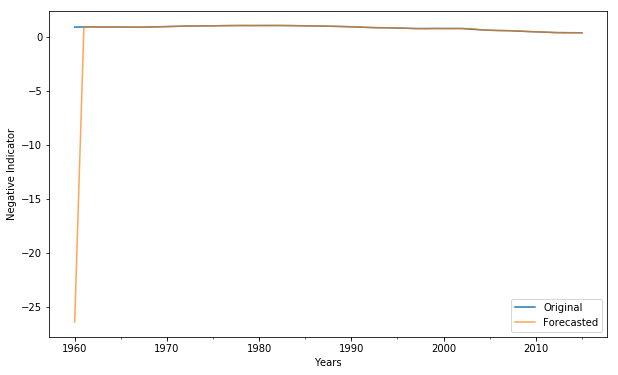

In [73]:
axis = df['Negative Indicators'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
df['Forecasted_Negative_Indicator'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Negative Indicator')
plt.legend(loc='best')
plt.show()
plt.close()

In [74]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

In [75]:
df_new=pd.DataFrame({'Forecast 2016-2020':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2016',end='31/12/2020',freq='y')
df_new.index=time
df_new

,Forecast 2016-2020,Standard Error,CI lower,CI Upper
2016-12-31,0.423596,0.012650,0.422803,0.424389
2017-12-31,0.420178,0.026308,0.418529,0.421828
2018-12-31,0.417344,0.041152,0.414763,0.419925
2019-12-31,0.414990,0.056497,0.411447,0.418533
2020-12-31,0.413032,0.071934,0.408521,0.417543


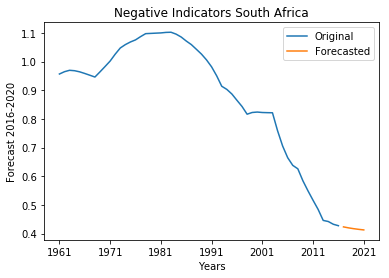

In [76]:
sns.lineplot(df.index,df['Negative Indicators'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast 2016-2020'],ci=None,label='Forecasted')
plt.title('Negative Indicators South Africa')
plt.xlabel('Years')
plt.legend()
plt.show()